### ## Step 2: Load the Dataset
The dataset is provided as a Google Sheet. If loading directly fails, download the sheet manually as a CSV and load it locally.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://docs.google.com/spreadsheets/d/1OGs8KoHGEZDxyFdaxAKmZbeO1BiSWVQ6/export?format=csv"
df=pd.read_csv(url)
print("Loaded successfully from Google Sheets.")




Loaded successfully from Google Sheets.


### # Data Preprocessing
### This notebook loads and preprocesses immigration data from the United Nations.
### Two methods are demonstrated:
### 1. Loading the data directly from Google Sheets
### 2. Loading the data from a locally downloaded CSV file

#### ## Step 3: Inspect the Data
Before preprocessing, view the dataset shape, first rows, and data types.

In [25]:
df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   41 non-null     object 
 1   Unnamed: 1   30 non-null     object 
 2   Unnamed: 2   31 non-null     object 
 3   Unnamed: 3   25 non-null     object 
 4   Unnamed: 4   30 non-null     object 
 5   Unnamed: 5   30 non-null     object 
 6   Unnamed: 6   30 non-null     object 
 7   Unnamed: 7   30 non-null     object 
 8   Unnamed: 8   30 non-null     object 
 9   Unnamed: 9   30 non-null     object 
 10  Unnamed: 10  30 non-null     object 
 11  Unnamed: 11  30 non-null     object 
 12  Unnamed: 12  30 non-null     object 
 13  Unnamed: 13  30 non-null     object 
 14  Unnamed: 14  30 non-null     object 
 15  Unnamed: 15  30 non-null     object 
 16  Unnamed: 16  30 non-null     object 
 17  Unnamed: 17  30 non-null     float64
 18  Unnamed: 18  30 non-null     object 
 19  Unnamed: 1

In [27]:
df.describe(include='all')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
count,41,30,31,25,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30.000000,1.0
unique,13,3,14,24,29,28,28,29,28,28,...,30,30,29,29,30,30,29,30,NaN,NaN
top,Immigrants,Foreigners,Africa,Northern America,..,..,..,..,..,..,...,2004,2005,1,3,2008,2009,..,2011,NaN,NaN
freq,29,28,5,2,2,3,3,2,3,3,...,1,1,2,2,1,1,2,1,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16941.500000,2013.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29631.147765,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2013.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1679.500000,2013.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7862.500000,2013.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14709.000000,2013.0


#### ## Step 4: Clean Column Names
Standardize column names by converting them to lowercase and replacing spaces with underscores.

In [28]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns


Index(['unnamed:_0', 'unnamed:_1', 'unnamed:_2', 'unnamed:_3', 'unnamed:_4',
       'unnamed:_5', 'unnamed:_6', 'unnamed:_7', 'unnamed:_8', 'unnamed:_9',
       'unnamed:_10', 'unnamed:_11', 'unnamed:_12', 'unnamed:_13',
       'unnamed:_14', 'unnamed:_15', 'unnamed:_16', 'unnamed:_17',
       'unnamed:_18', 'unnamed:_19', 'unnamed:_20', 'unnamed:_21',
       'unnamed:_22', 'unnamed:_23', 'unnamed:_24', 'unnamed:_25',
       'unnamed:_26', 'unnamed:_27', 'unnamed:_28', 'unnamed:_29',
       'unnamed:_30', 'unnamed:_31', 'unnamed:_32', 'unnamed:_33',
       'unnamed:_34', 'unnamed:_35', 'unnamed:_36', 'unnamed:_37'],
      dtype='object')

### ## Step 5: Handle Missing Values
Check for missing values and apply appropriate cleaning strategies.

In [29]:
df.isnull().sum()
df = df.dropna(how='all')      # remove completely empty rows
df = df.fillna(0)              # simple fill strategy


### ## Step 6: Convert Data Types
Convert numeric fields to numeric format and clean any invalid entries.


In [30]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='ignore')
    except:
        pass


/var/folders/nn/vq740qq17vn5hl5890qht89c0000gn/T/ipykernel_81658/1569797367.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


### ## Step 7: Basic Visualization
Visualize total immigration by year for the dataset.


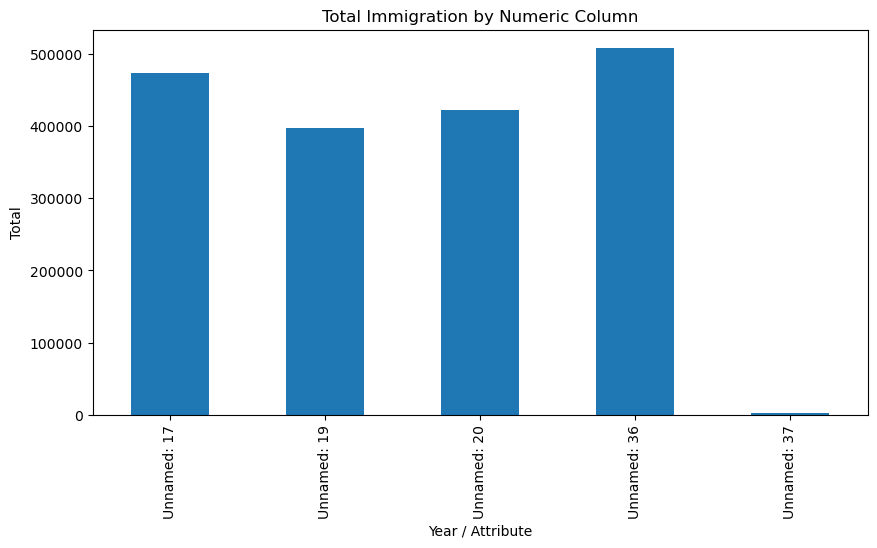

In [40]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols].sum().plot(kind='bar', figsize=(10,5))
plt.title("Total Immigration by Numeric Column")
plt.xlabel("Year / Attribute")
plt.ylabel("Total")
plt.show()


### ## Step 8: Save Cleaned Data
Export the cleaned dataset for use in future analysis.

In [41]:
df.to_csv("immigration_cleaned.csv", index=False)
print("Saved as immigration_cleaned.csv")


Saved as immigration_cleaned.csv


# # Summary
This notebook loaded the UN immigration dataset, cleaned and standardized the data, handled missing values, converted data types, and exported a clean version for analysis. The notebook is ready for submission and uploading to GitHub as required.
